In [2]:
import pandas as pd

from google.colab import files
uploaded = files.upload()
file_name=list(uploaded.keys())[0]
print(file_name)

df=pd.read_csv(file_name)
df

df.shape

df.corr(numeric_only=True)

#build model
import statsmodels.formula.api as smf


model=smf.ols('MPG~WT+VOL+SP+HP',data=df).fit()

model.params

print(model.tvalues, '\n', model.pvalues)

(model.rsquared, model.rsquared_adj)

ml_w=smf.ols('MPG~WT',data = df).fit()
print(ml_w.tvalues, '\n', ml_w.pvalues)

ml_w=smf.ols('MPG~WT+VOL',data = df).fit() # Changed 'cars' to 'df'
print(ml_w.tvalues, '\n', ml_w.pvalues)

Saving Cars.csv to Cars (1).csv
Cars (1).csv
Intercept    2.058841
WT           0.236541
VOL         -0.590970
SP           2.499880
HP          -5.238735
dtype: float64 
 Intercept    0.042936
WT           0.813649
VOL          0.556294
SP           0.014579
HP           0.000001
dtype: float64
Intercept    14.248923
WT           -5.508067
dtype: float64 
 Intercept    1.550788e-23
WT           4.383467e-07
dtype: float64
Intercept    12.545736
WT            0.489876
VOL          -0.709604
dtype: float64 
 Intercept    2.141975e-20
WT           6.255966e-01
VOL          4.800657e-01
dtype: float64


In [3]:

rsq_hp=smf.ols('HP~WT+VOL+SP',data=df).fit().rsquared
vif_hp=1/(1-rsq_hp)
vif_hp


19.92658897499852

In [4]:
rsq_wt=smf.ols('WT~HP+VOL+SP',data=df).fit().rsquared
vif_wt=1/(1-rsq_wt)
vif_wt


639.5338175572624

In [5]:
rsq_vol=smf.ols('VOL~HP+WT+SP',data=df).fit().rsquared
vif_vol=1/(1-rsq_vol)
vif_vol


638.8060836592878

In [6]:
rsq_sp=smf.ols('VOL~HP+WT+SP',data=df).fit().rsquared
vif_sp=1/(1-rsq_sp)
vif_vol

638.8060836592878

In [9]:
d1= {'Variables':['Hp','WT','VOL','SP'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
VIF = pd.DataFrame(d1)
VIF

,Variables,VIF
0,Hp,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,638.806084


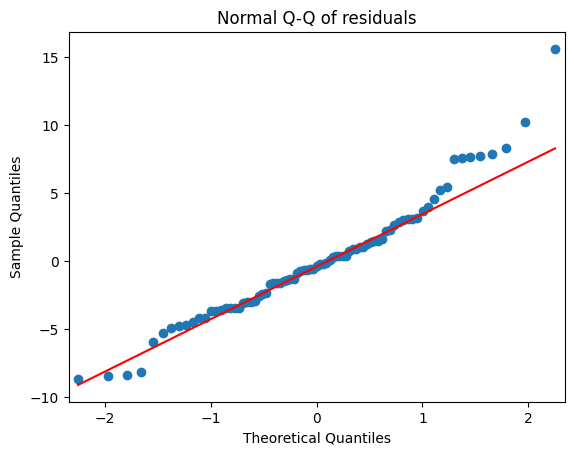

In [10]:
# QQ Plots

import statsmodels.api as sm
import matplotlib.pyplot as plt

qqplot = sm.qqplot(model.resid, line='q')
plt.title('Normal Q-Q of residuals')
plt.show()

In [13]:
import numpy as np

list (np.where (model.resid>10))
[np.array([0,76])]

[array([ 0, 76])]

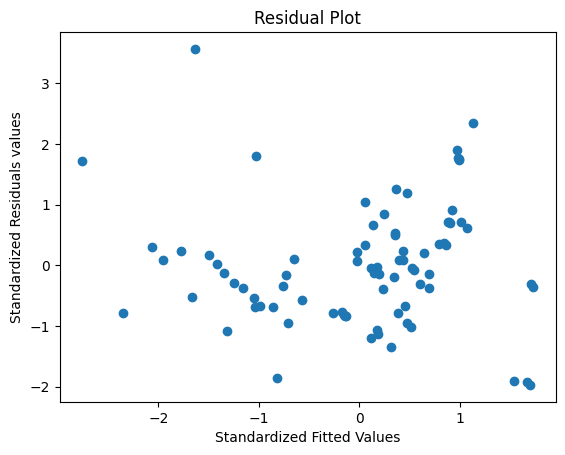

In [14]:
def get_standardized_values(vals):
  return (vals-vals.mean())/vals.std()

plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residuals values')
plt.show()